In [49]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2
from sklearn.externals import joblib

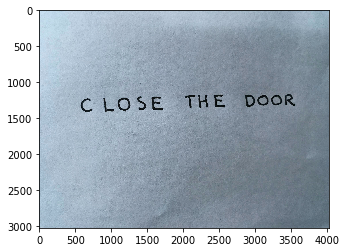

In [50]:
# Load model (accuracy larger than 80%)
clf =joblib.load("EMNIST_model.h5")  
# Load picture
img=cv2.imread("pic1.jpg")
plt.imshow(img,cmap="gray")
plt.show()

In [51]:
# create mapping dictionary (some labels presented for various values, such as O and 0, s and S)
mapping = {}
with open('emnist-balanced-mapping.txt', 'r') as f:
    for line in f:
        elements = line.rstrip().split(" ")
        mapping[elements[0]]=elements[1]    
mapping

{'0': '48',
 '1': '49',
 '2': '50',
 '3': '51',
 '4': '52',
 '5': '53',
 '6': '54',
 '7': '55',
 '8': '56',
 '9': '57',
 '10': '65',
 '11': '66',
 '12': '67',
 '13': '68',
 '14': '69',
 '15': '70',
 '16': '71',
 '17': '72',
 '18': '73',
 '19': '74',
 '20': '75',
 '21': '76',
 '22': '77',
 '23': '78',
 '24': '79',
 '25': '80',
 '26': '81',
 '27': '82',
 '28': '83',
 '29': '84',
 '30': '85',
 '31': '86',
 '32': '87',
 '33': '88',
 '34': '89',
 '35': '90',
 '36': '97',
 '37': '98',
 '38': '100',
 '39': '101',
 '40': '102',
 '41': '103',
 '42': '104',
 '43': '110',
 '44': '113',
 '45': '114',
 '46': '116'}

In [52]:
#Reshape Image
total_pixel = 500000.0
ratio = float(img.shape[1]) / float(img.shape[0])
new_h = int((total_pixel / ratio)**0.5 + 0.5)
new_w = int((new_h * ratio) + 0.5)
img = cv2.resize(img, (new_w,new_h))

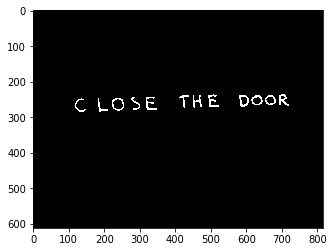

In [53]:
# image processing
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
ret,thresh = cv2.threshold(gray,80,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh,cmap="gray")
plt.show()

In [54]:
# Finding object
image, contours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
# Get rectangles contains each contour
rects = [cv2.boundingRect(ctr) for ctr in contours]
rects =sorted(rects, key=lambda x: x[0])

In [55]:
# Because images in data is flipped and rotated a function is needed to rotate and flip the image
def rotate_mirror_image(image, angle):    
    image=cv2.flip(image,  0)
    row,col = image.shape
    center=tuple(np.array([row,col])/2)
    rot_mat = cv2.getRotationMatrix2D(center,angle,1.0)
    new_image = cv2.warpAffine(image, rot_mat, (col,row))
    return new_image

In [56]:
# For each object found, predict the symbol with the loaded model EMNIST_model.h5
RESULTS=[]
for rect in rects:
    # Draw the rectangles
    cv2.rectangle(img, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0,255,0), 2) 
    # Make the rectangular region around the digit
    leng = int(rect[3] * 1.0)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    roi = thresh[pt1:pt1+leng, pt2:pt2+leng] 
    # Resize the image
    roi_pic = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    roi_pic =rotate_mirror_Image(roi_pic,-90) 
    roi = roi_pic.reshape(-1, 28, 28, 1)/255
    # Predict the symbol and encode with ASCII code (note that some labels has multi-values, such as O and 0, , such as O and 0, s and S)
    nbr = clf.predict(roi)
    nbr=np.argmax(nbr) 
    str_nbr=str(nbr)
    ASCII=int(mapping[str_nbr])
    symbol=chr(ASCII)   
    cv2.putText(img, symbol, (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 2, (0, 0, 255), 2)
    # add to list of all found value
    RESULTS.append(symbol)

['C', 'L', '0', 'S', 'E', 'T', 'H', 'E', 'D', '0', '0', 'R']


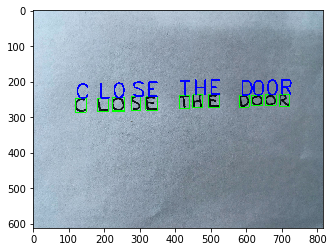

In [57]:
#printing the  result
print(RESULTS)
plt.imshow(img,cmap="gray")
plt.show()

## Error sources:
Errors can come from:
    Model error (accuracy >80%): 
    Image threshold, 
    Some symbol are divided into seperated part such as i or j, 
    etc.

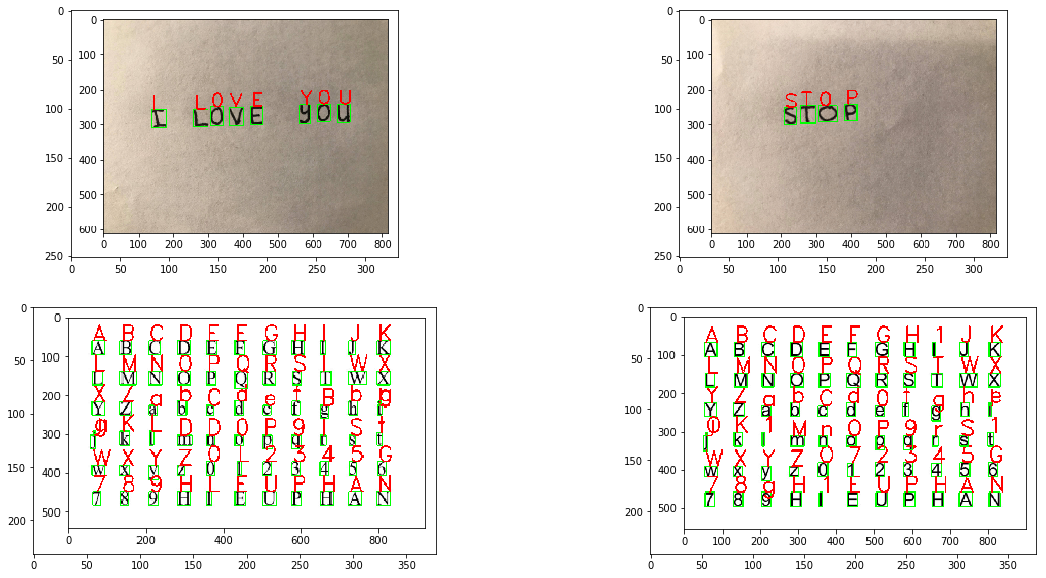

In [58]:
# Some other results
img1=cv2.imread("1.png")
img2=cv2.imread("2.png")
img3=cv2.imread("3.png")
img4=cv2.imread("4.png")
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.imshow(img1,cmap="gray")
plt.subplot(222)
plt.imshow(img2,cmap="gray")
plt.subplot(223)
plt.imshow(img3,cmap="gray")
plt.subplot(224)
plt.imshow(img4,cmap="gray")
plt.show()